<a href="https://colab.research.google.com/github/Seele00/Physics305Astro/blob/master/Phys305Astro_lab_assignment_module1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PS305 Lab Assignment** 
## Module 1: Image Stacking to Detect Pulsars in Radio Surveys

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 50 points each).

_Due Date_: **5PM of September 24 (Thu)**

_Credits_: This assignment is based on the Week 1 module of the Coursera course "Data-driven Astronomy", "Calculating the Mean Stack" ([link](https://www.coursera.org/learn/data-driven-astronomy/home/welcome))

### Student Information 

_Full Name (Last Name, First Name)_: Dizon, Gabriel Luis\
_Student No._: 2011-18116\
_Section_: WFY

### Submission Information

_Date and Time Submitted (most recent upload)_: 

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Gabriel Luis Dizon

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/50
* Part 2 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 0

For this assignment, you will work with Flexible Image Transport System (FITS) files-- one of the most widely used formats for astronomical images. In a FITS file, the image is stored in a numerical array, which we can load into a NumPy array. FITS files also have headers which store metadata about the image.

FITS files are a standard format and astronomers have developed many libraries (in many programming languages) that can read and write FITS files. We're going to use the Astropy module.

First, you need to make a copy of the five (5) FITS files $\tt image[0-4].fits$ and save it to a folder in your **own Google Drive**. These files are available from the PS305 Course Pack Google Drive (in the General > Datasets folder) and directly from this link: https://drive.google.com/drive/folders/1NECbwE_jtznZXkfOBa94W15MYR0gZfGI?usp=sharing

The code cells below will (1) mount your Google Drive and (2) load $\tt image0.fits$ from your Google Drive folder and visualize the image in image data stored in it. 

Mount the Google Drive where you saved the FITS files. 

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [2]:
!ls drive/My\ Drive

'71.1 syllabus 1SAY1819.gdoc'
'71.1 syllabus 2SAY1819 (1).gdoc'
'71.1 syllabus 2SAY1819.docx'
'71.1 syllabus 2SAY1819.gdoc'
'71 syllabus 1st sem 2016-2017.docx'
'Certification (1).gdoc'
 Certification.gdoc
 Colab_Notebooks
'Cover Letter (1).gdoc'
'Cover Letter.docx'
'Cover Letter.gdoc'
'CS_NIP_201819_S2_MS_Physics_Dizon_Gabriel Luis.pdf'
 dizon_ms_draft3v1.pdf
 DIZON_PHDPOS_Aug2020.gsheet
'Effect-of-Temperature-on-Refractive-Index-of-Liquids (2).gslides'
'Effect-of-Temperature-on-Refractive-Index-of-Liquids (2).pptx'
'FE Questions.gdoc'
'final Physics-71.1-Free-Fall_Busico_Daguio_Sediaren.gslides'
'final Physics-71.1-Free-Fall_Busico_Daguio_Sediaren.pptx'
'HBC HDE FBC FDE database (2S 16-17).xls'
'HBC HDE FBC FDE database (2S 16-17).xls.gsheet'
'LE 3 Questions (1).gdoc'
'LE 3 Questions.docx'
'LE 3 Questions.gdoc'
'Lecture 5 Motion with constant acceleration.pptx'
 MUD.gslides
'NIP Faculty Service Record Template.gsheet'
'OAT-OVCAA VAU-0088_SET-related Matters.pdf'
'P71 Lectures (Galit)

Define the directory path to the location of the file $\tt image0.fits$, i.e. if it is in a folder named "PS305" under My Drive, then the file path will be "/content/drive/My Drive/PS305". Change the string variable in the code cell below, as needed:

In [3]:
file_path = "/content/drive/My Drive/Colab_Notebooks/Phys305_Datasets/"

Now, we can load $\tt image0.fits$ and print out its header information

In [4]:
from astropy.io import fits
import matplotlib.pyplot as plt

hdulist = fits.open(file_path + 'image0.fits')
hdulist.info()

Filename: /content/drive/My Drive/Colab_Notebooks/Phys305_Datasets/image0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (200, 200)   float64   


Next, we will access the individual HDU (Header/Data Unit) by indexing the HDU list object returned by $\tt fits.open$. Then, we visualise the image data stored in FITS files using the plotting library matplotlib. The image data can be accessed using the data attribute.

The cell below creates a 2D plot from the FITS image:

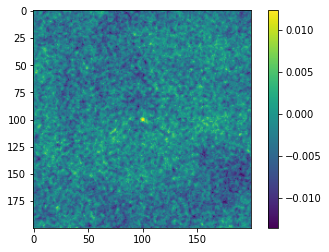

In [5]:
data = hdulist[0].data

# Plot the 2D image data
plt.imshow(data.T, cmap=plt.cm.viridis)
plt.colorbar()
plt.show()

In this assignment, you will calculate the mean of a stack of FITS files with images of the same pulsar. Each individual file may or may not have a detected pulsar, but in the final stack you should be able to see a clear detection.

#### PART 1 - Calculate the mean stack

Write a ```mean_fits``` function that takes a list of FITS files (including the file path for Google Drive access) as an argument, reads them in, and returns the mean image data of the FITS files. Your function should be able to process an arbitrary number of files.

All the images have the same dimensions (200 x 200) and your calculated mean array should match those dimensions.  

Run the ff. commands that runs your function for the five (5) given FITS files and prints out the central value of your returned array, which is where we expect the pulsar to be. (Hint: The answer should be 0.014150320738554)

```
data = mean_fits(['image0.fits', 'image1.fits', 'image2.fits', 'image3.fits', 'image4.fits'])
print(data[100, 100])
```
Discuss each section of your code clearly and concisely (in text cells, in your own words). *(50 points; 25 points each for the code and discussion)*

**Student Discussion:**

Assuming we have mounted the drive, initialized `file_path`, and loaded the relevant packages, we start by defining a function `data_extraction` that accepts as input the filename of the dataset and outputs the array of the image data. We do this in a separate function so that we may iteratively apply this for any number of image files provided.

In [6]:
import numpy as np

def data_extraction(data_filename):
  masterlist = fits.open(file_path + data_filename)
  img_data = masterlist[0].data

  return img_data

Now that `data_extraction` has been defined, we can now define `mean_fits`. This function takes a list or array of filename strings, extracts the relevant image data from those files in a `for` loop iterating `data_extraction`, then takes the mean matrix of all the image data using numpy's `np.mean` function. The function then outputs the mean image data of all of the data files.

In [7]:
def mean_fits(filename_array):
  all_data = [] #array collecting all the image data prior to taking the mean

  #extract image data from each file, append each matrix to a single array
  for name in filename_array:
    file_data = data_extraction(name)
    all_data.append(file_data)
  
  #take mean across all data matrices, return mean_data
  mean_data = np.mean(all_data, axis=0)
  return mean_data

To check if our code outputs the correct data, we print out the central value of the data matrix and check if it has the same value as above. As we can see below, our code works as intended.

In [9]:
data = mean_fits(['image0.fits', 'image1.fits', 'image2.fits', 'image3.fits', 'image4.fits'])
central_value = data[100, 100]

#prints central value
print(central_value)

#checks if central value is 0.014150320738554
print("Is the central value of the array given by 0.014150320738554? " + str(central_value == 0.014150320738554))

0.014150320738554
Is the central value of the array given by 0.014150320738554? True


#### PART 2 - Visualize the stacked image

Plot the output stacked image and describe what you see. *(50 points; 25 points each for the code and discussion)*

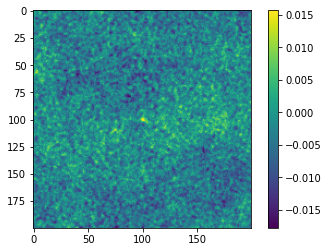

In [10]:
# Plot the 2D image data
plt.imshow(data.T, cmap=plt.cm.viridis)
plt.colorbar()
plt.show()

The image plot of the stacked data is shown above. There is a noticeable bright spot at the center (`[100,100]` spot) of the image, which likely corresponds to the location of the pulsar. There seem to be two noticeable jets of ionized matter shooting out of the pulsar along the image x-axis. (A third jet seems to exist as well within the `[100, (80-100)]` interval, but most of the material is directed along the x-axis.)

Along with the ionized jets are two considerably darker regions within the `[(50-100),(25-80)]` and `[x, (125-200)]` intervals. These may correspond to regions where the material isn't ionized or do not emit as much radio frequency radiation upon ionization.

[SCORE BREAKDOWN] 

Part 1:
* Correctness of Code: []/25
* Discussion: []/25
* Subtotal: []/50

Part 2:
* Correctness of Code: []/25
* Discussion: []/25
* Subtotal: []/50

Feedback: 